Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 03: Analysis of behavioural data

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 7, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will start to work on a real dataset from an ongoing experiment. In this experiment the participants were asked to freely explore an unknown virtual city, called Seahaven, with an interactive map. After a sufficiently long exploration the participants were tested on three different tasks: 

- the **absolute orientation** of a single house towards the north cardinal direction
- the **relative orientation** between two houses 
- **pointing** from the location of one house to the other

Each task type was performed in two time conditions:

- **3 seconds** for spontaneous decisions
- **infinite** response time for cognitive reasoning

These measurements were repeated up to three times on different days.

We will provide you with more detailed information about this experiment in the tutorial. If you are interested in more than this feel free to have a look at the paper https://www.biorxiv.org/content/10.1101/539080v1.

A small side remark to the dataset: The RTs for the absolute task are exactly the same for both time conditions. This is an error that cannot be corrected on a short notice. Please keep that in mind, when you evaluate your plots.

## Assignment 0: Peer review for sheet 02 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 11, 9 | 5, 1  | 8, 2  | 2, 7 | 10, 6 | 7, 11 | 6, 5  | 4, 3  | 3, 8  | 1, 4   | 9, 10  |

## Assignment 1: Preprocessing [3 pts]

In [129]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
# import xlrd library to read excel files 
import xlrd

### a) Preprocessing the data [1 pt]

First of all you should preprocess the data. This is an important step to avoid running into any problems when you start to analyse the data. Since we provide the Seahaven dataset as an excel file make sure to run ```pip install xlrd``` in your activated acc environment beforehand. This allows you to directly read from excel files.

- Import the data of all three tasks (Absolute, Relative, Pointing) into one dataframe. Since we don't need the whole data, load only the columns "ReactionTime", "AngularDiffBin", "Subject", "Task", "Time", "Answer" and "Measurement".
- Clean the dataframe of all NaNs, i.e. remove all rows where at least one element is missing. How many rows have been removed?
- Change the values of the column "Answer". Replace each value "wrong" with 0 and each value "correct" with 1.

In [130]:
# import data into dataframe (only mentioned columns)
PATH = os.getcwd()+ "/Seahaven_dataset.xlsx"

# merge all task type sheets into one data frame 
data = pd.read_excel(PATH, None)
all_sheets = []
for key in data.keys():
    all_sheets.append(data[key])
data_concatenated = pd.concat(all_sheets, axis = 0, ignore_index = True, sort=False)

# consider only mentioned columns within the data frame 
df = pd.DataFrame()
df = data_concatenated[["ReactionTime", "AngularDiffBin", "Subject", "Task", "Time", "Answer", "Measurement"]]

# save length of df with rows including NaNs 
df_len_with_nans = len(df)

# remove rows with at least one NaN 
df = df.dropna()

# save length of df with rows including NaNs 
df_len_without_nans = len(df)

# In Answers column, replace wrong answers with 0, correct answers with 1
df.loc[df["Answer"] == 'wrong', "Answer"] = 0
df.loc[df["Answer"] == 'correct', "Answer"] = 1

# display dataframe 
df

,ReactionTime,AngularDiffBin,Subject,Task,Time,Answer,Measurement
0,1.664824,150.0,1216.0,Absolute,3sec,0,1.0
1,0.865788,30.0,1216.0,Absolute,3sec,1,1.0
2,1.284187,60.0,1216.0,Absolute,3sec,0,1.0
3,2.081390,180.0,1216.0,Absolute,3sec,0,1.0
4,1.424746,120.0,1216.0,Absolute,3sec,1,1.0
5,1.498336,180.0,1216.0,Absolute,3sec,1,1.0
6,1.213375,150.0,1216.0,Absolute,3sec,0,1.0
7,1.248617,60.0,1216.0,Absolute,3sec,1,1.0
8,0.788024,120.0,1216.0,Absolute,3sec,1,1.0
9,1.573254,90.0,1216.0,Absolute,3sec,1,1.0


In [131]:
# print number of rows with NaNs, without NaNs and deleted rows in total 
print("Number of Rows with NaNs: {} \nNumber of Rows without NaNs: {} \nDeleted Rows: {}".format(df_len_with_nans, df_len_without_nans, df_len_with_nans - df_len_without_nans))

Number of Rows with NaNs: 21384 
Number of Rows without NaNs: 20083 
Deleted Rows: 1301


### b) Checking the distribution of the data [2 pts]

Most of the analysis techniques require normally distributed data. To get an idea on how the data looks like use the **preprocessed data** from 1.a) and plot for each task a violinplot that displays the data distribution of the RTs (note that you also have to distinguish between the two time conditions - 3sec and Infinite).

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the mean RT per subject.
- Make a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- Hint: Play with the keyword inner.
- Using your plots, what can you say about the distribution of the data? It is normally distributed? How is it skewed?

MeanRT
Subject Task     Time               
1216.0  Absolute 3sec       1.341370
                 Infinite   1.341370
        Pointing 3sec       1.324583
                 Infinite   1.663641
        Relative 3sec       1.015738
                 Infinite   2.554127
1217.0  Absolute 3sec       1.810178
                 Infinite   1.810178
        Pointing 3sec       1.877376
                 Infinite  24.158690
...                              ...
9997.0  Pointing 3sec       2.293616
                 Infinite   4.584341
        Relative 3sec       1.652760
                 Infinite   3.567794
9998.0  Absolute 3sec       2.075091
                 Infinite   2.075091
        Pointing 3sec       2.090532
                 Infinite   5.634722
        Relative 3sec       2.126811
                 Infinite   7.638568

[582 rows x 1 columns]

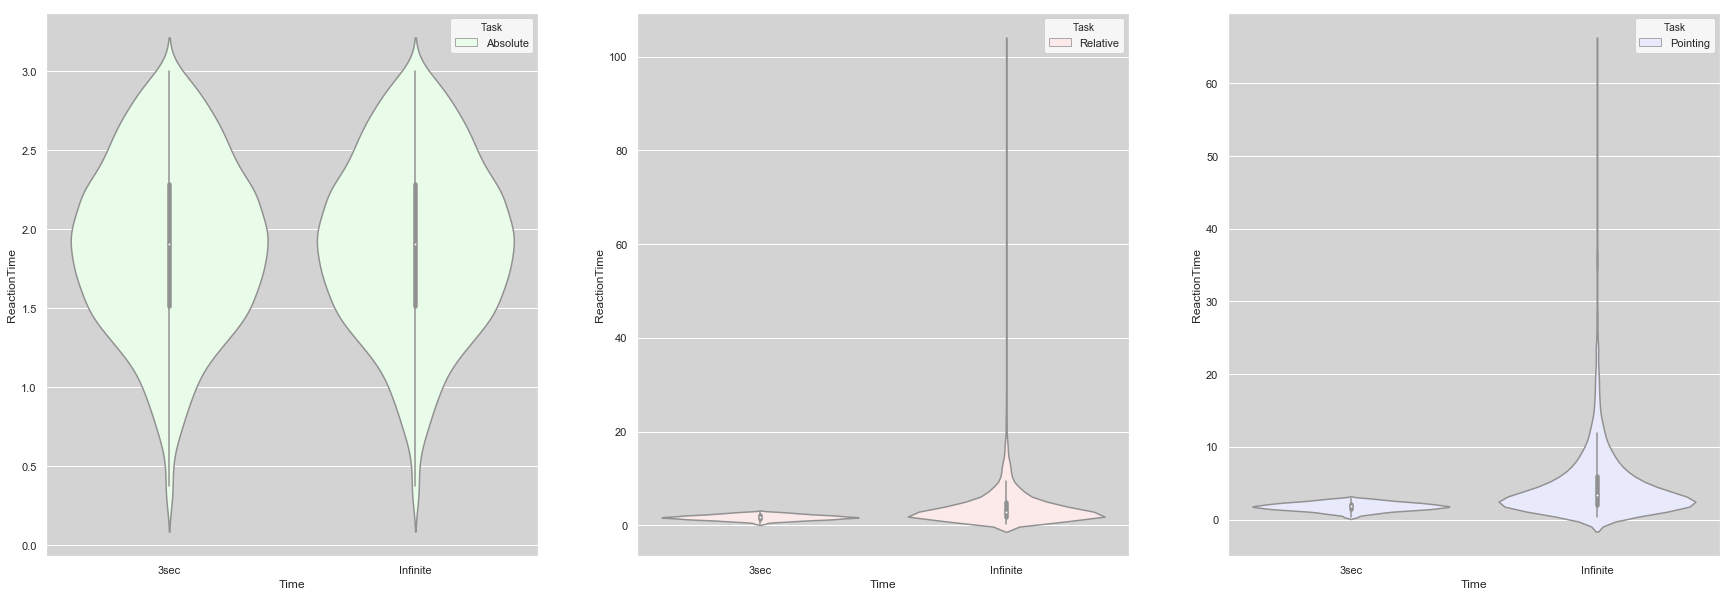

In [231]:
import statistics

# create axes and manage color settings of axis face and hue
sns.set(rc = {'axes.facecolor': 'lightgray'})
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(30, 10))
sns.set(rc = {'axes.facecolor': 'white'})

# drop columns which are not necessary for calculating the mean reaction time 
df_mean = df.drop(['AngularDiffBin', 'Answer', 'Measurement'], axis=1)

# calculate mean reaction time for each task type and time condition grouped by subject 
df_mean = df_mean.groupby(['Subject', 'Task', 'Time']).mean()
df_mean = df_mean.rename(columns = {'ReactionTime': 'MeanRT'})

# only consider rows where the task type is absolute/relative/pointing for later displaying the violin plots
df_absolute = df[(df['Task'] == "Absolute")]
df_relative = df[(df['Task'] == "Relative")]
df_pointing = df[(df['Task'] == "Pointing")]

# display a violinplot for absolute task which displays the distribution of reaction time (time conditions are distinguished)
sns.violinplot(data = df_absolute, x = "Time", y = "ReactionTime", hue = "Task", color = 'green', ax = axes[0])
# display a violinplot for relative task which displays the distribution of reaction time (time conditions are distinguished)
sns.violinplot(data = df_relative, x = 'Time', y = 'ReactionTime', hue = 'Task', color = 'red', ax = axes[1])
# display a violinplot for pointing task which displays the distribution of reaction time (time conditions are distinguished)
sns.violinplot(data = df_pointing, x = 'Time', y = 'ReactionTime', hue = 'Task', color = 'blue', ax = axes[2])

# use pd.set_option here to display in a nice way
pd.set_option("display.max_rows", 20)

# display the mean reaction time 
df_mean

**Answer:** 

The violin plots of task type "Absolute" look pretty normally distributed. In contrast to the first two violin plots, the other ones with infinite time seem to suffer from extreme outliers. 

You may have noticed that there are (extreme) outliers, that have to be removed from the **preprocessed data**.

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) look at the RTs and keep only the ones that are within +2 and -2 standard deviation:

$ |(RT_{group1} - mean(RT_{group1}))| \leq (2*std(RT_{group1})) $

$group1$ = e.g. data of absolute task for time condition 3sec

- Make again a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- How does the distribution of the data look now? Is it still skewed?

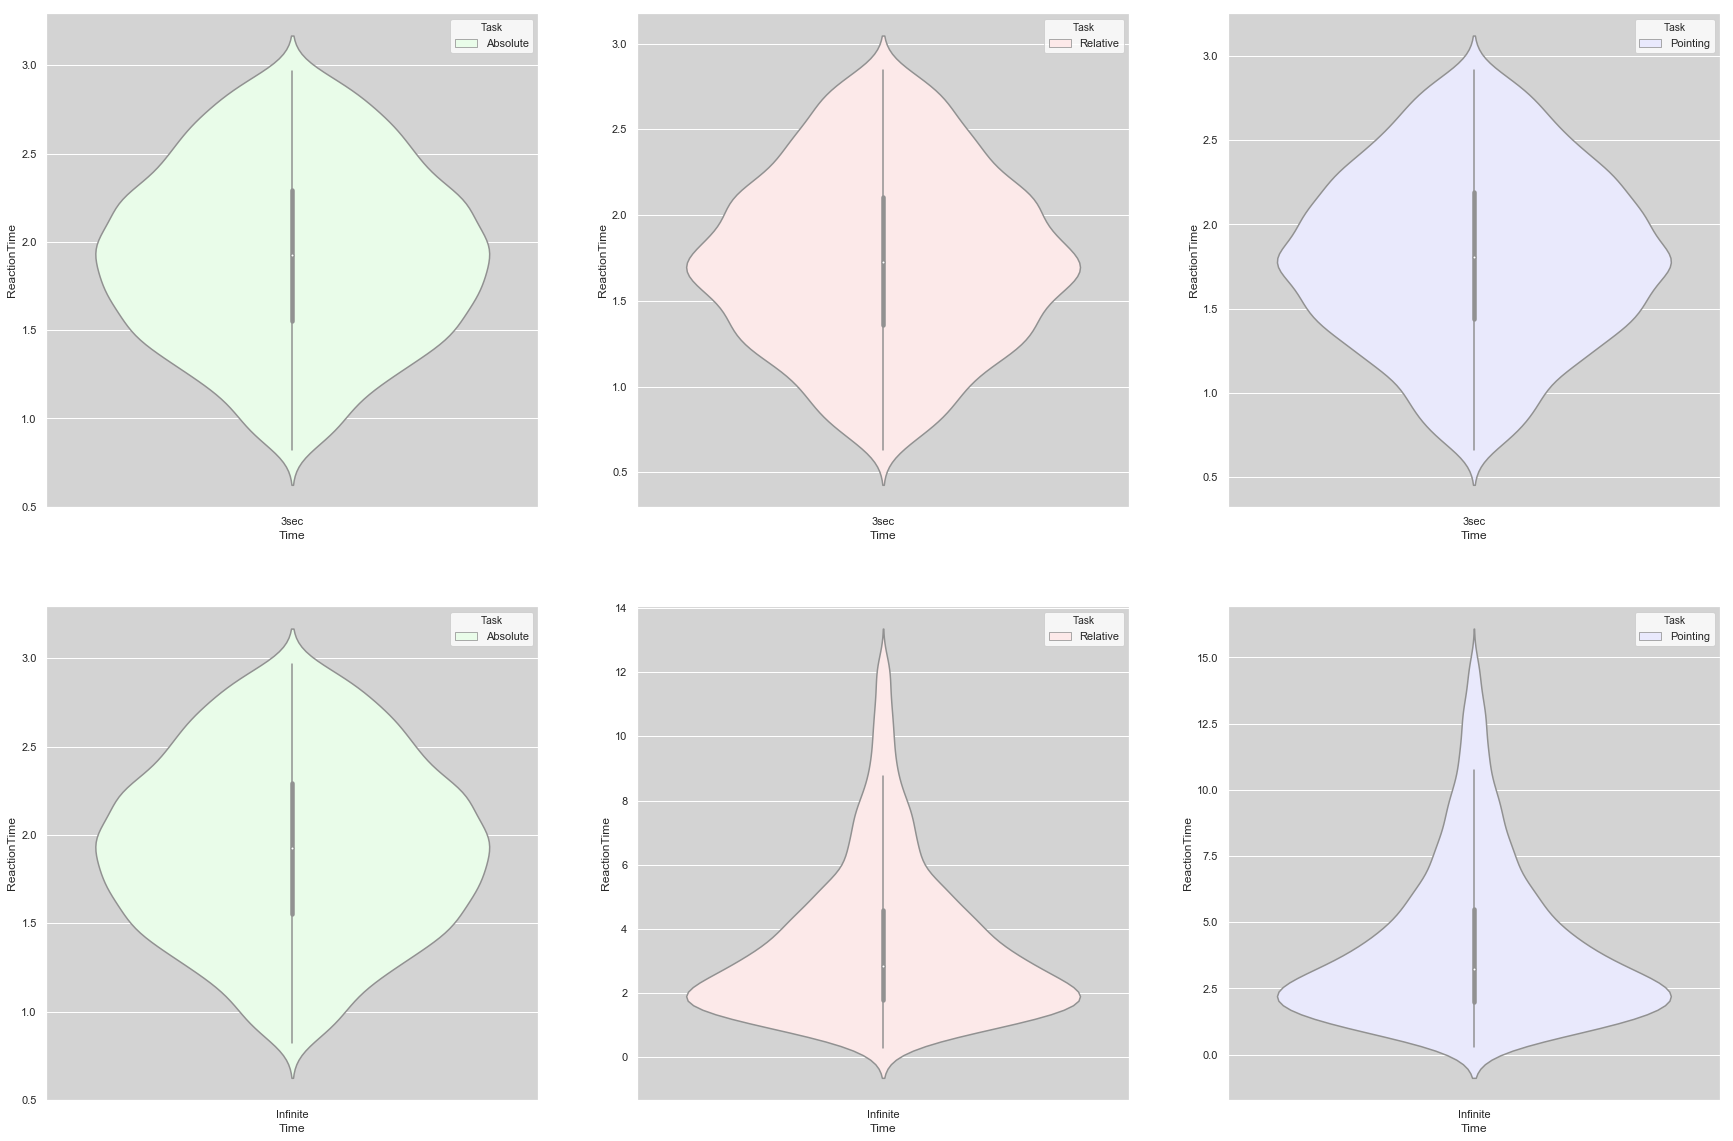

In [232]:
# split data frames according to task type and time, so that we have 6 groups
# Group 1
df_absolute_sec = df_absolute[(df_absolute["Time"] == "3sec")] 
# Group 2
df_absolute_inf = df_absolute[(df_absolute["Time"] == "Infinite")] 
# Group 3
df_relative_sec = df_relative[(df_relative["Time"] == "3sec")] 
# Group 4
df_relative_inf = df_relative[(df_relative["Time"] == "Infinite")] 
# Group 5
df_pointing_sec = df_pointing[(df_pointing["Time"] == "3sec")] 
# Group 6
df_pointing_inf = df_pointing[(df_pointing["Time"] == "Infinite")] 

# remove outliers for that 6 groups (using the formula mentioned above in the task)
# Group 1
df_absolute_sec = df_absolute_sec[np.abs(df_absolute_sec.ReactionTime - df_absolute_sec.ReactionTime.mean()) <= (2 * df_absolute_sec.ReactionTime.std())]
# Group 2
df_absolute_inf = df_absolute_inf[np.abs(df_absolute_inf.ReactionTime - df_absolute_inf.ReactionTime.mean()) <= (2 * df_absolute_inf.ReactionTime.std())]
# Group 3
df_relative_sec = df_relative_sec[np.abs(df_relative_sec.ReactionTime - df_relative_sec.ReactionTime.mean()) <= (2 * df_relative_sec.ReactionTime.std())]
# Group 4
df_relative_inf = df_relative_inf[np.abs(df_relative_inf.ReactionTime - df_relative_inf.ReactionTime.mean()) <= (2 * df_relative_inf.ReactionTime.std())]
# Group 5
df_pointing_sec = df_pointing_sec[np.abs(df_pointing_sec.ReactionTime - df_pointing_sec.ReactionTime.mean()) <= (2 * df_pointing_sec.ReactionTime.std())]
# Group 6
df_pointing_inf = df_pointing_inf[np.abs(df_pointing_inf.ReactionTime - df_pointing_inf.ReactionTime.mean()) <= (2 * df_pointing_inf.ReactionTime.std())]

# create axes and manage color settings of axis face and hue
sns.set(rc = {'axes.facecolor': 'lightgray'})
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(30, 20))
sns.set(rc = {'axes.facecolor': 'white'})

# display a violinplot for absolute task which displays the distribution of reaction time (time condition 3sec)
sns.violinplot(data = df_absolute_sec, x = "Time", y = "ReactionTime", hue = "Task", color = 'green', ax = axes[0][0])
# display a violinplot for absolute task which displays the distribution of reaction time (time condition Infinite)
sns.violinplot(data = df_absolute_inf, x = "Time", y = "ReactionTime", hue = "Task", color = 'green', ax = axes[1][0])
# display a violinplot for relative task which displays the distribution of reaction time (time condition 3sec)
sns.violinplot(data = df_relative_sec, x = 'Time', y = 'ReactionTime', hue = 'Task', color = 'red', ax = axes[0][1])
# display a violinplot for relative task which displays the distribution of reaction time (time condition Infinite)
sns.violinplot(data = df_relative_inf, x = 'Time', y = 'ReactionTime', hue = 'Task', color = 'red', ax = axes[1][1])
# display a violinplot for pointing task which displays the distribution of reaction time (time condition 3sec)
sns.violinplot(data = df_pointing_sec, x = 'Time', y = 'ReactionTime', hue = 'Task', color = 'blue', ax = axes[0][2])
# display a violinplot for pointing task which displays the distribution of reaction time (time condition 3sec)
sns.violinplot(data = df_pointing_inf, x = 'Time', y = 'ReactionTime', hue = 'Task', color = 'blue', ax = axes[1][2])

**Answer:** 

The violin plots of task types "Relative" and "Pointing" do not suffer from outliers anymore for the time condition "Infinite". 

**Please make sure that you use the preprocessed data without outliers for the following assignments!**

## Assignment 2: Checking for possible hypotheses [5 pts]

### a) Hypothesis 1 [2 pt]

**Hypothesis 1:** "Given that subjects are limited by time, if they are faster in RT they are also less accurate."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a scatterplot of the mean RT (x-axis) and the accuracy (y-axis) for the time condition "3sec". 
- Make a second scatterplot and add a simple linear regression line to it. Calculate the slope of the regression line (you are allowed to use scipy). 
- Considering your results, what can you say about the hypothesis?

In [233]:
# drop columns which are not necessary 
df_relative_sec = df_relative_sec.drop(['AngularDiffBin', 'Measurement'], axis=1)
df_relative_inf = df_relative_inf.drop(['AngularDiffBin', 'Measurement'], axis=1)

[Text(0.5, 1.0, 'Slope = 0.07498057236036142')]

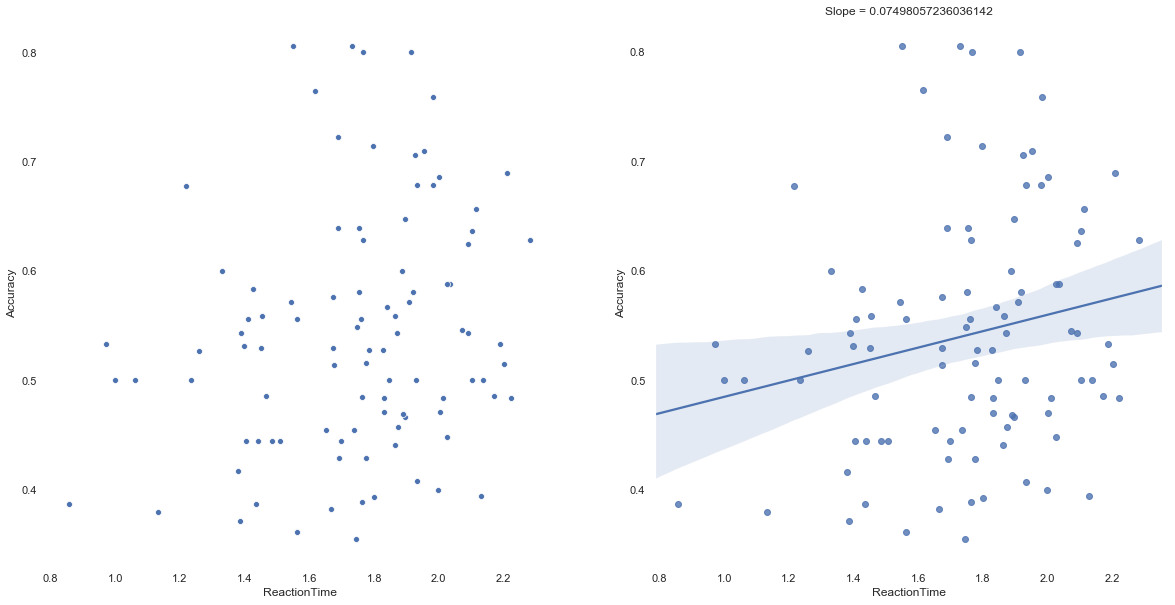

In [234]:
# calculate mean reaction time for time condition "3sec"
df_relative_sec_mean = df_relative_sec.groupby(['Subject']).mean()
# calculate mean reaction time for time condition "Infinite"
df_relative_inf_mean = df_relative_inf.groupby(['Subject']).mean()
# rename "Answer" to "Accuracy"
df_relative_sec_mean = df_relative_sec_mean.rename(columns = {'Answer':'Accuracy'})
df_relative_inf_mean = df_relative_inf_mean.rename(columns = {'Answer':'Accuracy'})

fig, ax = plt.subplots(figsize=(20, 10), ncols = 2)
# create a scatterplot comparing mean reaction time and accuracy 
sns.scatterplot(data = df_relative_sec_mean, x = 'ReactionTime', y = 'Accuracy', ax = ax[0])
# create a scatterplot and regression line comparing mean reaction time and accuracy 
sns.regplot(data = df_relative_sec_mean, x = 'ReactionTime', y = 'Accuracy', ax = ax[1])
# calculate slope of regression line 
x = df_relative_sec_mean['ReactionTime']
y = df_relative_sec_mean['Accuracy']
slope, _, _, _, _ = stats.linregress(x,y)
# show slope in figure 
ax[1].set(title = "Slope = {}".format(slope))


**Answer:** 

The Scatterplot shows that the more time the subject needs/has to react, the more accurate their reactions are. So the hypothesis might be true. 

### b) Hypothesis 2 [1 pt]

**Hypothesis 2:** "Given that subjects have infinite time, they perform better."

- Use the data of all three tasks.
- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the tasks (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

In [235]:
# drop columns which are not necessary 
df_absolute_sec = df_absolute_sec.drop(['AngularDiffBin', 'Measurement'], axis=1)
df_absolute_inf = df_absolute_inf.drop(['AngularDiffBin', 'Measurement'], axis=1)
df_pointing_sec = df_pointing_sec.drop(['AngularDiffBin', 'Measurement'], axis=1)
df_pointing_inf = df_pointing_inf.drop(['AngularDiffBin', 'Measurement'], axis=1)

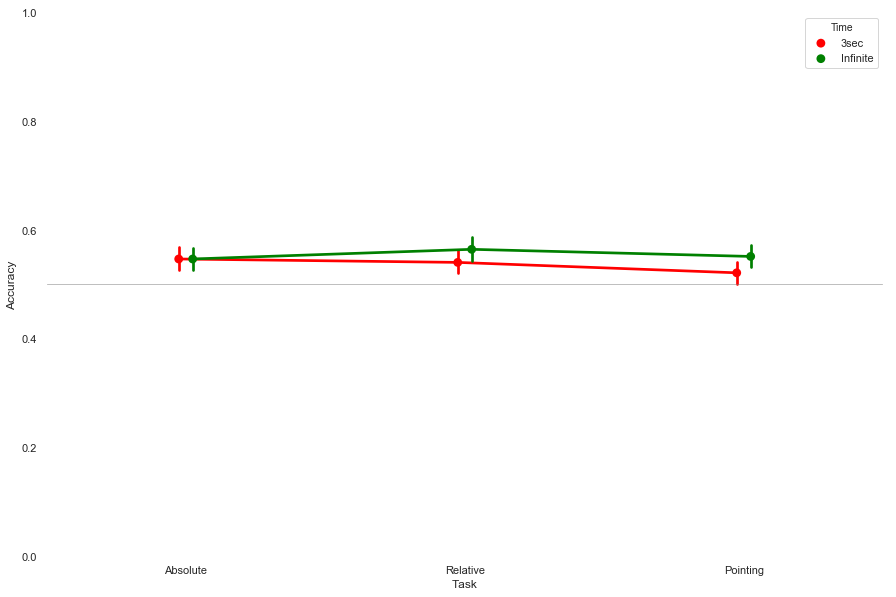

In [259]:
# calculate mean reaction time for time condition "3sec"
df_absolute_sec_mean = df_absolute_sec.groupby(['Subject']).mean()
df_pointing_sec_mean = df_pointing_sec.groupby(['Subject']).mean()
# calculate mean reaction time for time condition "Infinite"
df_absolute_inf_mean = df_absolute_inf.groupby(['Subject']).mean()
df_pointing_inf_mean = df_pointing_inf.groupby(['Subject']).mean()

# rename "Answer" to "Accuracy"
df_absolute_sec_mean = df_absolute_sec_mean.rename(columns = {'Answer':'Accuracy'})
df_pointing_sec_mean = df_pointing_sec_mean.rename(columns = {'Answer':'Accuracy'})
df_absolute_inf_mean = df_absolute_inf_mean.rename(columns = {'Answer':'Accuracy'})
df_pointing_inf_mean = df_pointing_inf_mean.rename(columns = {'Answer':'Accuracy'})

# add "Task" and "Time" manually 
#(I tried to use groupby(['Subject', 'Task', 'Time']) instead, but then the column names couldn't be interpreted while plotting somehow)
df_absolute_sec_mean['Task'] = "Absolute"
df_absolute_sec_mean['Time'] = "3sec"
df_relative_sec_mean['Task'] = "Relative"
df_relative_sec_mean['Time'] = "3sec"
df_pointing_sec_mean['Task'] = "Pointing"
df_pointing_sec_mean['Time'] = "3sec"
df_absolute_inf_mean['Task'] = "Absolute"
df_absolute_inf_mean['Time'] = "Infinite"
df_relative_inf_mean['Task'] = "Relative"
df_relative_inf_mean['Time'] = "Infinite"
df_pointing_inf_mean['Task'] = "Pointing"
df_pointing_inf_mean['Time'] = "Infinite"

# concatenate all the data and add task type 
df_absolute_mean = pd.concat([df_absolute_sec_mean, df_absolute_inf_mean])
df_relative_mean = pd.concat([df_relative_sec_mean, df_relative_inf_mean])
df_pointing_mean = pd.concat([df_pointing_sec_mean, df_pointing_inf_mean])
df_concatenated = pd.DataFrame()
df_concatenated = pd.concat([df_absolute_mean, df_relative_mean, df_pointing_mean])

# create axes 
fig, ax = plt.subplots(figsize=(15, 10))
# create a pointplot comparing accuracy of reaction times for the different task types 
sns.pointplot(data = df_concatenated, x = 'Task', y = 'Accuracy', hue = 'Time', palette = ['red', 'green'], dodge = True)
# set appropriate y-axis range 
ax.set(ylim = (0, 1))
# draw a line at accuracy=50% 
ax.axhline(y = 0.5, color = 'gray', linewidth = 0.5)


### d) Hypothesis 3 [1 pt]

**Hypothesis 3:** "With each subsequent session subjects get better in performance."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the measurement (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Make also a pointplot of the measurement (x-axis) and RT (y-axis) for both time conditions (3sec / Infinite).  Make sure that the data is displayed clearly. You may split up the single plots for a better overview.
- Considering your plots, what can you say about the hypothesis?

In [ ]:
# TODO

### c) Hypothesis 4 [1 pts]

**Hypothesis 4:** "When the angular difference between houses increases subjects are more accurate in the relative task."

- Use the data of the relative task.
- For each angular difference (see "AngularDiffBin") calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the angular differences (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance. Make sure that the angular differences are displayed in ascending order.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

In [ ]:
# TODO

## Assignment 3: T-test [2 pts]

We will perform a two-sample t-test, i.e. we compare the mean of two groups under the assumption that both are independent and normally distributed with unknown but equal variances. In this case we will look at the data of the relative task and compare the accuracies of the two time conditions (3sec / Infinte). We will ignore that there are different measurement days!

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Check if the data is normally distributed using scipy.stats.normaltest.


- Compute the t-statistics: $ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

$\bar{x}_1$: mean accuracy of all subjects for time condition "3sec" <br>
$\bar{x}_2$: mean accuracy of all subjects for time condition "Infinite" <br>
$n_1$: sample size for time condition "3sec" <br>
$n_2$: sample size for time condition "Infinite"


- with $ s^2 = \frac{\sum_{i=1}^n{(x_i - \bar{x})^2}}{n-1} $

$x_i$: accuracy of subject i <br>
$\bar{x}$: mean accuracy of all subjects <br>
$n$: sample size


- Calculate the degrees of freedom: $ df = n_1 + n_2 -2 $
- What does the p-value of a t-test tell you in general? Also explain what your calculated p-value tells you specifically (given $\alpha = 0.05$)?

In [ ]:
# TODO

# gives you the p-value after comparing the t-statistic with the critical t value (computed internally) 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))

# test if your calculation is correct
t2, p2 = stats.ttest_ind(x1,x2)
print("t = " + str(t2))
print("p = " + str(p2))